### ISM mode 


In [63]:
import numpy as np
import pandas as pd
from IPython.display import display, Markdown, Latex,HTML
from matplotlib import pyplot
import matplotlib.pylab as plt
import seaborn as sns
import os
import pygraphviz as pgv
from pygraphviz import *

In [64]:
print("Enter File Name")
base_path = os.getcwd()
while True:
    filename = input()
    full_path = os.path.join(base_path,filename)
    if  os.path.isfile(full_path):
        print("file found")
        break
    else:
        print("file not found. please enter proper input file name or place the file in  the same directory")

file_id = filename.split('.')[0]

Enter File Name


 AE3p.csv


file found


## Initial Reachability Matrix


In [65]:
#/Users/saching12/Desktop/python codes/ISM/
df = pd.read_csv(full_path, delim_whitespace=True, index_col=0)
name = " <h3>Structural Self-Interaction Matrix : </h3>"
display(Markdown(name))
display(df)
IPM = np.empty(df.shape, dtype=int)

size = len(df.columns)
i = 0
# index is not being used
for index, row in df.iterrows():
    size = len(df.columns)
    while size > 0:
        if i == size - 1:
            IPM[size - 1][i] = 1
        elif pd.isnull(row[str(size)]):
            break
        else:
            if row[str(size)] == 'V':
                IPM[i][size - 1] = 1
                IPM[size - 1][i] = 0
            elif row[str(size)] == 'A':
                IPM[i][size - 1] = 0
                IPM[size - 1][i] = 1
            elif row[str(size)] == 'X':
                IPM[i][size - 1] = 1
                IPM[size - 1][i] = 1
            elif row[str(size)] == 'O':
                IPM[i][size - 1] = 0
                IPM[size - 1][i] = 0
            else:
                print("Invalid Output")
        size -= 1
    i += 1




FRM = IPM.copy()
FRM = pd.DataFrame(data=FRM,columns=df.columns[::-1],index=df.index.values)
name = " <h3>Initial Reachability Matrix : </h3>"
display(Markdown(name))
FRM


 <h3>Structural Self-Interaction Matrix : </h3>

,12,11,10,9,8,7,6,5,4,3,2,1
parameters,,,,,,,,,,,,
1,V,V,V,O,O,O,O,O,V,V,V,NaN
2,V,V,V,O,O,A,A,A,V,X,NaN,NaN
3,V,V,V,O,O,O,O,A,V,NaN,NaN,NaN
4,V,V,V,O,O,O,O,A,NaN,NaN,NaN,NaN
5,V,V,V,V,V,A,V,NaN,NaN,NaN,NaN,NaN
6,V,V,V,V,V,A,NaN,NaN,NaN,NaN,NaN,NaN
7,V,V,V,V,V,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,V,V,V,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,V,V,V,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


 <h3>Initial Reachability Matrix : </h3>

,1,2,3,4,5,6,7,8,9,10,11,12
1,1,1,1,1,0,0,0,0,0,1,1,1
2,0,1,1,1,0,0,0,0,0,1,1,1
3,0,1,1,1,0,0,0,0,0,1,1,1
4,0,0,0,1,0,0,0,0,0,1,1,1
5,0,1,1,1,1,1,0,1,1,1,1,1
6,0,1,0,0,0,1,0,1,1,1,1,1
7,0,1,0,0,1,1,1,1,1,1,1,1
8,0,0,0,0,0,0,0,1,0,1,1,1
9,0,0,0,0,0,0,0,1,1,1,1,1
10,0,0,0,0,0,0,0,0,0,1,1,1


In [66]:
n = IPM.shape[0]   
FRM = IPM.copy()
for  i in range(n):
    for j in range(n):
        if FRM[i,j] == 1:           
            for k in range(n):
                if FRM[j,k] == 1:
                    FRM[i,k] = 1

FRM_df = pd.DataFrame(data=FRM,columns=df.columns[::-1],index=df.index.values)
name = " <h3>Final Reachability Matrix : </h3>"
display(Markdown(name))
display(FRM_df)  

 <h3>Final Reachability Matrix : </h3>

,1,2,3,4,5,6,7,8,9,10,11,12
1,1,1,1,1,0,0,0,0,0,1,1,1
2,0,1,1,1,0,0,0,0,0,1,1,1
3,0,1,1,1,0,0,0,0,0,1,1,1
4,0,0,0,1,0,0,0,0,0,1,1,1
5,0,1,1,1,1,1,0,1,1,1,1,1
6,0,1,1,1,0,1,0,1,1,1,1,1
7,0,1,1,1,1,1,1,1,1,1,1,1
8,0,0,0,0,0,0,0,1,0,1,1,1
9,0,0,0,0,0,0,0,1,1,1,1,1
10,0,0,0,0,0,0,0,0,0,1,1,1


In [67]:
# ## Final Reachability Matrix
# n = IPM.shape[0]   
# FRM = IPM.copy()
# for  k in range(n):
#     for i in range(n):
#         for j in range(n):
#             FRM[i,j]= FRM[i][j] or (FRM[i][k] and FRM[k][j])

# FRM_df = pd.DataFrame(data=FRM,columns=df.columns[::-1],index=df.index.values)
# name = " <h3>Final Reachability Matrix : </h3>"
# display(Markdown(name))
# display(FRM_df)

In [68]:
## Creating barrier level
frm = pd.DataFrame(columns=['Parameter', 'Reachability_set', 'Level'], dtype=np.int8)
for i, row in enumerate(FRM):
    sub_list = []
    for index, val in enumerate(row):
        if val == 1:
            sub_list.append(index + 1)

    frm = frm.append({'Parameter': i + 1, 'Reachability_set': set(sub_list)}, ignore_index=True)

Antecedent_set = {}
Intersection_set = {}

for i, column in enumerate(FRM.T):
    sub_list = []
    for index, val in enumerate(column):
        if val == 1:
            sub_list.append(index + 1)

    Antecedent_set[i + 1] = set(sub_list)
    
for index, Antecedent in Antecedent_set.items():
    [val] = frm[frm['Parameter'] == index]['Reachability_set'].values
#print(val)
    Intersection_set[index] = Antecedent.intersection(val)
    
    
Antecedent = pd.DataFrame(list(Antecedent_set.items()), columns=['Parameter', 'Antecedent_set'])
Intersection = pd.DataFrame(list(Intersection_set.items()), columns=['Parameter', 'Intersection_set'])

Antecedent = Antecedent.merge(Intersection, on='Parameter')
BLI = frm.merge(Antecedent, on='Parameter')

BLI_copy = BLI
name = " <h3>Initial Barrier Level : </h3>"
display(Markdown(name))
display(BLI_copy)


 <h3>Initial Barrier Level : </h3>

,Parameter,Reachability_set,Level,Antecedent_set,Intersection_set
0,1,"{1, 2, 3, 4, 10, 11, 12}",NaN,{1},{1}
1,2,"{2, 3, 4, 10, 11, 12}",NaN,"{1, 2, 3, 5, 6, 7}","{2, 3}"
2,3,"{2, 3, 4, 10, 11, 12}",NaN,"{1, 2, 3, 5, 6, 7}","{2, 3}"
3,4,"{10, 11, 4, 12}",NaN,"{1, 2, 3, 4, 5, 6, 7}",{4}
4,5,"{2, 3, 4, 5, 6, 8, 9, 10, 11, 12}",NaN,"{5, 7}",{5}
5,6,"{2, 3, 4, 6, 8, 9, 10, 11, 12}",NaN,"{5, 6, 7}",{6}
6,7,"{2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}",NaN,{7},{7}
7,8,"{8, 10, 11, 12}",NaN,"{5, 6, 7, 8, 9}",{8}
8,9,"{8, 9, 10, 11, 12}",NaN,"{9, 5, 6, 7}",{9}
9,10,"{10, 11, 12}",NaN,"{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}","{10, 11, 12}"



# Barrier Level Iteration:



In [69]:
BLI = BLI_copy
level = 1
removed_numbers = []
BLI_final = pd.DataFrame(columns=['Parameter', 'Reachability_set','Antecedent_set','Intersection_set', 'Level'], dtype=np.int8)
while len(BLI.index) > 0:
    tem_list = BLI[BLI['Reachability_set'] == BLI['Intersection_set']]['Parameter']
    if len(tem_list.tolist()) == 0:
        break
    removed_numbers += tem_list.tolist()
    BLI.loc[BLI['Reachability_set'] == BLI['Intersection_set'], 'Level'] = level
    iteration = " <h3>Iteration Number: "+str(level)+ '</h3>'
    display(Markdown(iteration))
    display(BLI)
    for i in BLI.index:
        x = BLI.at[i,'Parameter']
        if x in removed_numbers:
            #print(BLI.loc[i]) 
            BLI_final = BLI_final.append(BLI.loc[i])
            BLI.at[i,'Intersection_set'] = None
            BLI = BLI.drop(i,axis = 0)
            
            continue
        else:
            Reachablility_temp = BLI.at[i,'Reachability_set']
            Reachablility_temp = [d for d in Reachablility_temp if float(d) not in removed_numbers]
            BLI.at[i,'Reachability_set'] =  set(Reachablility_temp)
            Antecedent_temp = BLI.at[i,'Antecedent_set']
            Antecedent_temp = [d for d in Antecedent_temp if d not in removed_numbers]
            BLI.at[i, 'Antecedent_set'] = set(Antecedent_temp)
            BLI.at[i,'Intersection_set'] = set(Antecedent_temp).intersection(set(Reachablility_temp))
    level += 1



 <h3>Iteration Number: 1</h3>

,Parameter,Reachability_set,Level,Antecedent_set,Intersection_set
0,1,"{1, 2, 3, 4, 10, 11, 12}",NaN,{1},{1}
1,2,"{2, 3, 4, 10, 11, 12}",NaN,"{1, 2, 3, 5, 6, 7}","{2, 3}"
2,3,"{2, 3, 4, 10, 11, 12}",NaN,"{1, 2, 3, 5, 6, 7}","{2, 3}"
3,4,"{10, 11, 4, 12}",NaN,"{1, 2, 3, 4, 5, 6, 7}",{4}
4,5,"{2, 3, 4, 5, 6, 8, 9, 10, 11, 12}",NaN,"{5, 7}",{5}
5,6,"{2, 3, 4, 6, 8, 9, 10, 11, 12}",NaN,"{5, 6, 7}",{6}
6,7,"{2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}",NaN,{7},{7}
7,8,"{8, 10, 11, 12}",NaN,"{5, 6, 7, 8, 9}",{8}
8,9,"{8, 9, 10, 11, 12}",NaN,"{9, 5, 6, 7}",{9}
9,10,"{10, 11, 12}",1.0,"{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}","{10, 11, 12}"


 <h3>Iteration Number: 2</h3>

,Parameter,Reachability_set,Level,Antecedent_set,Intersection_set
0,1,"{1, 2, 3, 4}",NaN,{1},{1}
1,2,"{2, 3, 4}",NaN,"{1, 2, 3, 5, 6, 7}","{2, 3}"
2,3,"{2, 3, 4}",NaN,"{1, 2, 3, 5, 6, 7}","{2, 3}"
3,4,{4},2.0,"{1, 2, 3, 4, 5, 6, 7}",{4}
4,5,"{2, 3, 4, 5, 6, 8, 9}",NaN,"{5, 7}",{5}
5,6,"{2, 3, 4, 6, 8, 9}",NaN,"{5, 6, 7}",{6}
6,7,"{2, 3, 4, 5, 6, 7, 8, 9}",NaN,{7},{7}
7,8,{8},2.0,"{5, 6, 7, 8, 9}",{8}
8,9,"{8, 9}",NaN,"{9, 5, 6, 7}",{9}


 <h3>Iteration Number: 3</h3>

,Parameter,Reachability_set,Level,Antecedent_set,Intersection_set
0,1,"{1, 2, 3}",NaN,{1},{1}
1,2,"{2, 3}",3.0,"{1, 2, 3, 5, 6, 7}","{2, 3}"
2,3,"{2, 3}",3.0,"{1, 2, 3, 5, 6, 7}","{2, 3}"
4,5,"{2, 3, 5, 6, 9}",NaN,"{5, 7}",{5}
5,6,"{9, 2, 3, 6}",NaN,"{5, 6, 7}",{6}
6,7,"{2, 3, 5, 6, 7, 9}",NaN,{7},{7}
8,9,{9},3.0,"{9, 5, 6, 7}",{9}


 <h3>Iteration Number: 4</h3>

,Parameter,Reachability_set,Level,Antecedent_set,Intersection_set
0,1,{1},4.0,{1},{1}
4,5,"{5, 6}",NaN,"{5, 7}",{5}
5,6,{6},4.0,"{5, 6, 7}",{6}
6,7,"{5, 6, 7}",NaN,{7},{7}


 <h3>Iteration Number: 5</h3>

,Parameter,Reachability_set,Level,Antecedent_set,Intersection_set
4,5,{5},5.0,"{5, 7}",{5}
6,7,"{5, 7}",NaN,{7},{7}


 <h3>Iteration Number: 6</h3>

,Parameter,Reachability_set,Level,Antecedent_set,Intersection_set
6,7,{7},6.0,{7},{7}


In [70]:
display(Markdown('<h2>Final Barrier Level Iteration<h2>'))
display(BLI_final)


<h2>Final Barrier Level Iteration<h2>

,Parameter,Reachability_set,Antecedent_set,Intersection_set,Level
9,10,"{10, 11, 12}","{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}","{10, 11, 12}",1.0
10,11,"{10, 11, 12}","{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}","{10, 11, 12}",1.0
11,12,"{10, 11, 12}","{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}","{10, 11, 12}",1.0
3,4,{4},"{1, 2, 3, 4, 5, 6, 7}",{4},2.0
7,8,{8},"{5, 6, 7, 8, 9}",{8},2.0
1,2,"{2, 3}","{1, 2, 3, 5, 6, 7}","{2, 3}",3.0
2,3,"{2, 3}","{1, 2, 3, 5, 6, 7}","{2, 3}",3.0
8,9,{9},"{9, 5, 6, 7}",{9},3.0
0,1,{1},{1},{1},4.0
5,6,{6},"{5, 6, 7}",{6},4.0


In [71]:
index = [int(d) for d in BLI_final['Parameter'].tolist()] 

FRM_df =FRM_df.reindex(index)
column = [str(d) for d in index] 
#column.append('Driving_power')
#print(column)
FRM_df = FRM_df[column]
display(Markdown('<h2>Conical Matrix:<h2>'))
display(FRM_df)



<h2>Conical Matrix:<h2>

,10,11,12,4,8,2,3,9,1,6,5,7
10,1,1,1,0,0,0,0,0,0,0,0,0
11,1,1,1,0,0,0,0,0,0,0,0,0
12,1,1,1,0,0,0,0,0,0,0,0,0
4,1,1,1,1,0,0,0,0,0,0,0,0
8,1,1,1,0,1,0,0,0,0,0,0,0
2,1,1,1,1,0,1,1,0,0,0,0,0
3,1,1,1,1,0,1,1,0,0,0,0,0
9,1,1,1,0,1,0,0,1,0,0,0,0
1,1,1,1,1,0,1,1,0,1,0,0,0
6,1,1,1,1,1,1,1,1,0,1,0,0


## Digraph Plot

In [72]:
FRM_df_copy = FRM_df.copy()
FRM_df_copy.columns = FRM_df_copy.columns.astype(int)

for i in range(len(FRM_df_copy.columns)):
    FRM_df_copy.iloc[i,i] = 0


top_level_df = FRM_df_copy.sum(axis=1)
top_level_index = set(top_level_df[top_level_df == 0].index)
top_level_index = set(BLI_final[BLI_final.Level == 1.0].Parameter.astype(int).tolist())
bottom_level_df = FRM_df_copy.sum(axis=0)
display(bottom_level_df)
bottom_level_index = set(bottom_level_df[bottom_level_df == 0].index)

display(FRM_df_copy)
display(Markdown("<h3>Top level index : </h3>"))
display(top_level_index)
display(Markdown("<h3>Bottom level index : </h3>"))
display(bottom_level_index)


intersection = (top_level_index).intersection(bottom_level_index)

if len(intersection) > 0:
    bottom_level_index = bottom_level_index.difference(intersection)
    top_level_index = top_level_index.difference(intersection)
    FRM_df_copy = FRM_df_copy.drop(list(intersection),axis=0)
    FRM_df_copy = FRM_df_copy.drop(list(intersection),axis=1)
    
    

Relation_table = {}
for bottom_index in bottom_level_index:
    Relation_table[bottom_index] = []
    for top_index in top_level_index:
        if FRM_df_copy.at[bottom_index,top_index] == 1:
            Relation_table[bottom_index].append(top_index)

delete_key_list = []
display("Relation table")
display(Relation_table)   
## TODO: Check if it is working properly
print
print(list(Relation_table))
for key1, outer_value in Relation_table.items():
    if key1 in delete_key_list:
            continue
    for key2, inner_value in Relation_table.items():
        if key1 == key2:
            continue
        if set(Relation_table[key2]).issubset(set(Relation_table[key1])):
            delete_key_list.append(key2)

print(delete_key_list)
for key1 in delete_key_list:
        del Relation_table[key1]

display(Relation_table)   

list_of_N = {}
j = 1
for key in Relation_table:
        index_list = Relation_table[key]        
        temp_df = FRM_df_copy.loc[:,index_list].copy()
        #print(temp_df)
        final_series = temp_df.iloc[:,0].copy()
        #print(final_series)
        for i in range(len(temp_df.columns)):
            final_series = final_series | temp_df.iloc[:,i]
        #    print(final_series)
        df_N = FRM_df_copy.copy()
        for i in range(len(df_N.columns)):    
            df_N.iloc[:,i] = df_N.iloc[:,i] & final_series
        list_of_N[key] = df_N.copy()   
        display(list_of_N[key])
        j+=1
del j        

for key in list_of_N.keys():
    list_of_N[key]
    drop_rows = list_of_N[key].sum(axis=1)
    drop_rows_index = drop_rows[drop_rows == 0].index
    drop_columns = list_of_N[key].sum(axis=0)
    drop_columns_index = drop_columns[drop_columns == 0].index

    list_of_N[key] = list_of_N[key].drop(drop_rows_index,axis=0)
    list_of_N[key] = list_of_N[key].drop(drop_columns_index,axis=1)
    display(list_of_N[key])
    


10    11
11    11
12    11
4      6
8      4
2      5
3      5
9      3
1      0
6      2
5      1
7      0
dtype: int64

,10,11,12,4,8,2,3,9,1,6,5,7
10,0,1,1,0,0,0,0,0,0,0,0,0
11,1,0,1,0,0,0,0,0,0,0,0,0
12,1,1,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,0,0,0
8,1,1,1,0,0,0,0,0,0,0,0,0
2,1,1,1,1,0,0,1,0,0,0,0,0
3,1,1,1,1,0,1,0,0,0,0,0,0
9,1,1,1,0,1,0,0,0,0,0,0,0
1,1,1,1,1,0,1,1,0,0,0,0,0
6,1,1,1,1,1,1,1,1,0,0,0,0


<h3>Top level index : </h3>

{10, 11, 12}

<h3>Bottom level index : </h3>

{1, 7}

'Relation table'

{1: [10, 11, 12], 7: [10, 11, 12]}

[1, 7]
[7]


{1: [10, 11, 12]}

,10,11,12,4,8,2,3,9,1,6,5,7
10,0,1,1,0,0,0,0,0,0,0,0,0
11,1,0,1,0,0,0,0,0,0,0,0,0
12,1,1,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,0,0,0
8,1,1,1,0,0,0,0,0,0,0,0,0
2,1,1,1,1,0,0,1,0,0,0,0,0
3,1,1,1,1,0,1,0,0,0,0,0,0
9,1,1,1,0,1,0,0,0,0,0,0,0
1,1,1,1,1,0,1,1,0,0,0,0,0
6,1,1,1,1,1,1,1,1,0,0,0,0


,10,11,12,4,8,2,3,9,6,5
10,0,1,1,0,0,0,0,0,0,0
11,1,0,1,0,0,0,0,0,0,0
12,1,1,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,0
8,1,1,1,0,0,0,0,0,0,0
2,1,1,1,1,0,0,1,0,0,0
3,1,1,1,1,0,1,0,0,0,0
9,1,1,1,0,1,0,0,0,0,0
1,1,1,1,1,0,1,1,0,0,0
6,1,1,1,1,1,1,1,1,0,0


In [73]:
graph=pgv.AGraph(directed=True)

for key, N_val in list_of_N.items():
        graph.add_nodes_from(Relation_table[key])
        max_val = max_column = max(N_val.columns)
        max_row = max(N_val.index)
        if max_column < max_row:
            max_val = max_row
        while len(N_val.columns) > 0:
            drop_rows = N_val.sum(axis=1)
            drop_rows_index = drop_rows[drop_rows == 1].index            
            drop_columns = N_val.sum(axis=0)
            ###print("drop columns",drop_columns)
            drop_columns_index = drop_columns[drop_columns == 1].index
            ## Regular Row elemination
            ###print("drop row indexes",drop_rows_index)
            ###print("drop column indexes",drop_columns_index)
            if len(drop_rows_index) > 0 :
                ### print("in Row elemination mode")
                row_index = drop_rows_index[0]
                ### print("before updating c_j to ")

                ### display(N_val)

                ## step 1 : create a new column of c_j* = c_j * ~c_i
                ## get column name(index) whose value is 1 for the respective row
                d=N_val.loc[row_index]
                column_index = d[d == 1].index[0]
                ###print("column Index: ",column_index)
                c_j = N_val.loc[:,column_index]   
                row_index_backup = row_index
                if row_index  > max_val:
                    row_index = int(row_index/10)
                if row_index in N_val.columns:
                    ## getting row value
                    ###print("row index: ",row_index)
                    ## get c_i
                    c_i = N_val.loc[:,row_index].astype(bool)
                    print(c_i)
                    c_j = c_j * (~ c_i)
                
                ## update the connected subordinate matrix here it is N_val
                N_val.loc[:,column_index] = c_j   

                ## step 2 delete the row with row index and all rows and columns with all zeros

                N_val = N_val.drop(row_index_backup,axis=0)

                drop_rows = N_val.sum(axis=1)
                drop_rows_index = drop_rows[drop_rows == 0].index
                drop_columns = N_val.sum(axis=0)
                drop_columns_index = drop_columns[drop_columns == 0].index
                N_val = N_val.drop(drop_rows_index,axis=0)
                N_val = N_val.drop(drop_columns_index,axis=1)
                ## step 3: add the node to graph and connection

                graph.add_edge(row_index,column_index)
                print("after adding to graph row and column to graph",row_index,column_index)

                display(N_val)
            elif len(drop_columns_index) > 0 :
                print("in Column elemination mode")

                column_index = drop_columns_index[0]
                
                ## step 1 : create a new row of r_j* = r_j * ~r_i
                ## get row name(index) whose value is 1 for the respective row
                d=N_val.loc[:,column_index]
                row_index = d[d == 1].index[0]
                r_i = N_val.loc[row_index]     

                if column_index in N_val.index:
                    ## getting column value
                    ## get r_j i.e row with index of colun name
                    r_j = N_val.loc[column_index].astype(bool)
                    print(r_j)
                    r_i = r_i * (~ r_j)
#                 else:
#                     print("Column index: ",column_index)
#                     print("all the indexes: ",N_val.index)
#                 print("printing final_row_series")
#                 print(r_i)

#                 ## update the connected subordinate matrix here it is N_val
                N_val.loc[row_index] = r_i           
                
                ## step 2 delete the column with column index and all rows and columns with all zeros

                N_val = N_val.drop(column_index,axis=1)

                drop_rows = N_val.sum(axis=1)
                drop_rows_index = drop_rows[drop_rows == 0].index
                drop_columns = N_val.sum(axis=0)
                drop_columns_index = drop_columns[drop_columns == 0].index
                N_val = N_val.drop(drop_rows_index,axis=0)
                N_val = N_val.drop(drop_columns_index,axis=1)
                ## step 3: add the node to graph and connection
                if row_index  > max_val:
                    row_index = int(row_index/10)
                graph.add_edge(row_index,column_index)
                print("after adding to graph row and column to graph",row_index,column_index)

                display(N_val)
            else:
                print("in else mode")
                modify_row = N_val.sum(axis=1).sort_values(ascending=True)
                modify_row_index = modify_row.index[0]
                no_of_elements = len(N_val.columns)
                array = np.zeros(no_of_elements,dtype=int)
                input_row = pd.Series(array,index=N_val.columns)
                modify_row_values = N_val.loc[modify_row_index]
                column_indexes = modify_row_values[modify_row_values == 1].index
                for i,index in enumerate(column_indexes):
                    input_row[index] = 1
                    ind = modify_row_index*10 + i
                    N_val.loc[ind] = input_row
                    input_row[index] = 0
                N_val = N_val.drop(modify_row_index,axis=0)

graph.layout(prog='dot')        
graph.draw(file_id+'.png')

in Column elemination mode
10     True
11     True
12     True
4      True
8      True
2      True
3      True
9      True
6      True
5     False
Name: 5, dtype: bool
after adding to graph row and column to graph 7 5


,10,11,12,4,8,2,3,9,6
10,0,1,1,0,0,0,0,0,0
11,1,0,1,0,0,0,0,0,0
12,1,1,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0
8,1,1,1,0,0,0,0,0,0
2,1,1,1,1,0,0,1,0,0
3,1,1,1,1,0,1,0,0,0
9,1,1,1,0,1,0,0,0,0
1,1,1,1,1,0,1,1,0,0
6,1,1,1,1,1,1,1,1,0


in Column elemination mode
10     True
11     True
12     True
4      True
8      True
2      True
3      True
9      True
6     False
Name: 6, dtype: bool
after adding to graph row and column to graph 5 6


,10,11,12,4,8,2,3,9
10,0,1,1,0,0,0,0,0
11,1,0,1,0,0,0,0,0
12,1,1,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0
8,1,1,1,0,0,0,0,0
2,1,1,1,1,0,0,1,0
3,1,1,1,1,0,1,0,0
9,1,1,1,0,1,0,0,0
1,1,1,1,1,0,1,1,0
6,1,1,1,1,1,1,1,1


in Column elemination mode
10     True
11     True
12     True
4     False
8      True
2     False
3     False
9     False
Name: 9, dtype: bool
after adding to graph row and column to graph 6 9


,10,11,12,4,8,2,3
10,0,1,1,0,0,0,0
11,1,0,1,0,0,0,0
12,1,1,0,0,0,0,0
4,1,1,1,0,0,0,0
8,1,1,1,0,0,0,0
2,1,1,1,1,0,0,1
3,1,1,1,1,0,1,0
9,1,1,1,0,1,0,0
1,1,1,1,1,0,1,1
6,0,0,0,1,0,1,1


in Column elemination mode
10     True
11     True
12     True
4     False
8     False
2     False
3     False
Name: 8, dtype: bool
after adding to graph row and column to graph 9 8


,10,11,12,4,2,3
10,0,1,1,0,0,0
11,1,0,1,0,0,0
12,1,1,0,0,0,0
4,1,1,1,0,0,0
8,1,1,1,0,0,0
2,1,1,1,1,0,1
3,1,1,1,1,1,0
1,1,1,1,1,1,1
6,0,0,0,1,1,1


in else mode
11      True
12      True
4       True
8       True
2       True
3       True
1       True
6      False
100    False
101    False
Name: 10, dtype: bool
after adding to graph row and column to graph 10 11


,10,12,4,2,3
11,1,1,0,0,0
12,1,0,0,0,0
4,1,1,0,0,0
8,1,1,0,0,0
2,1,1,1,0,1
3,1,1,1,1,0
1,1,1,1,1,1
6,0,0,1,1,1
101,0,1,0,0,0


11      True
12     False
4       True
8       True
2       True
3       True
1       True
6      False
101     True
Name: 12, dtype: bool
after adding to graph row and column to graph 12 10


,12,4,2,3
11,1,0,0,0
4,1,0,0,0
8,1,0,0,0
2,1,1,0,1
3,1,1,1,0
1,1,1,1,1
6,0,1,1,1
101,1,0,0,0


after adding to graph row and column to graph 11 12


,12,4,2,3
4,1,0,0,0
8,1,0,0,0
2,1,1,0,1
3,1,1,1,0
1,1,1,1,1
6,0,1,1,1
101,1,0,0,0


4      False
8      False
2       True
3       True
1       True
6       True
101    False
Name: 4, dtype: bool
after adding to graph row and column to graph 4 12


,12,4,2,3
8,1,0,0,0
2,0,1,0,1
3,0,1,1,0
1,0,1,1,1
6,0,1,1,1
101,1,0,0,0


after adding to graph row and column to graph 8 12


,12,4,2,3
2,0,1,0,1
3,0,1,1,0
1,0,1,1,1
6,0,1,1,1
101,1,0,0,0


after adding to graph row and column to graph 10 12


,4,2,3
2,1,0,1
3,1,1,0
1,1,1,1
6,1,1,1


in else mode
3      True
1      True
6      True
20    False
21    False
Name: 2, dtype: bool
after adding to graph row and column to graph 2 4


,2,3
3,1,0
1,1,1
6,1,1
21,0,1


3     False
1      True
6      True
21     True
Name: 3, dtype: bool
after adding to graph row and column to graph 3 2


,3
1,1
6,1
21,1


after adding to graph row and column to graph 1 3


,3
6,1
21,1


after adding to graph row and column to graph 6 3


,3
21,1


after adding to graph row and column to graph 2 3


""


In [74]:
!rm -rf $file_id

## Dependency power and Driving power

In [75]:
dependency_power = FRM_df.sum(axis=0).rename("Dependency_power")
Driving_power = FRM_df.sum(axis=1)
#print(type(Driving_power))
#dependency_power =dependency_power.rename("Dependency_power")
FRM_df = FRM_df.append(dependency_power)
FRM_df['Driving_power'] = Driving_power
FRM_df

,10,11,12,4,8,2,3,9,1,6,5,7,Driving_power
10,1,1,1,0,0,0,0,0,0,0,0,0,3.0
11,1,1,1,0,0,0,0,0,0,0,0,0,3.0
12,1,1,1,0,0,0,0,0,0,0,0,0,3.0
4,1,1,1,1,0,0,0,0,0,0,0,0,4.0
8,1,1,1,0,1,0,0,0,0,0,0,0,4.0
2,1,1,1,1,0,1,1,0,0,0,0,0,6.0
3,1,1,1,1,0,1,1,0,0,0,0,0,6.0
9,1,1,1,0,1,0,0,1,0,0,0,0,5.0
1,1,1,1,1,0,1,1,0,1,0,0,0,7.0
6,1,1,1,1,1,1,1,1,0,1,0,0,9.0


## Dependency power and Driving power Diagram 

In [76]:
plot_frame = pd.DataFrame()
plot_frame['Dependency_power'] = FRM_df.loc['Dependency_power'].dropna().tolist()
plot_frame['Driving_power'] = Driving_power.tolist()
plot_frame['Parameters'] = list(map(int,BLI_final['Parameter'].tolist()))

In [77]:
from collections import Counter
combos =  list(zip(plot_frame.Dependency_power, plot_frame.Driving_power))
list_of_combos = Counter(combos)

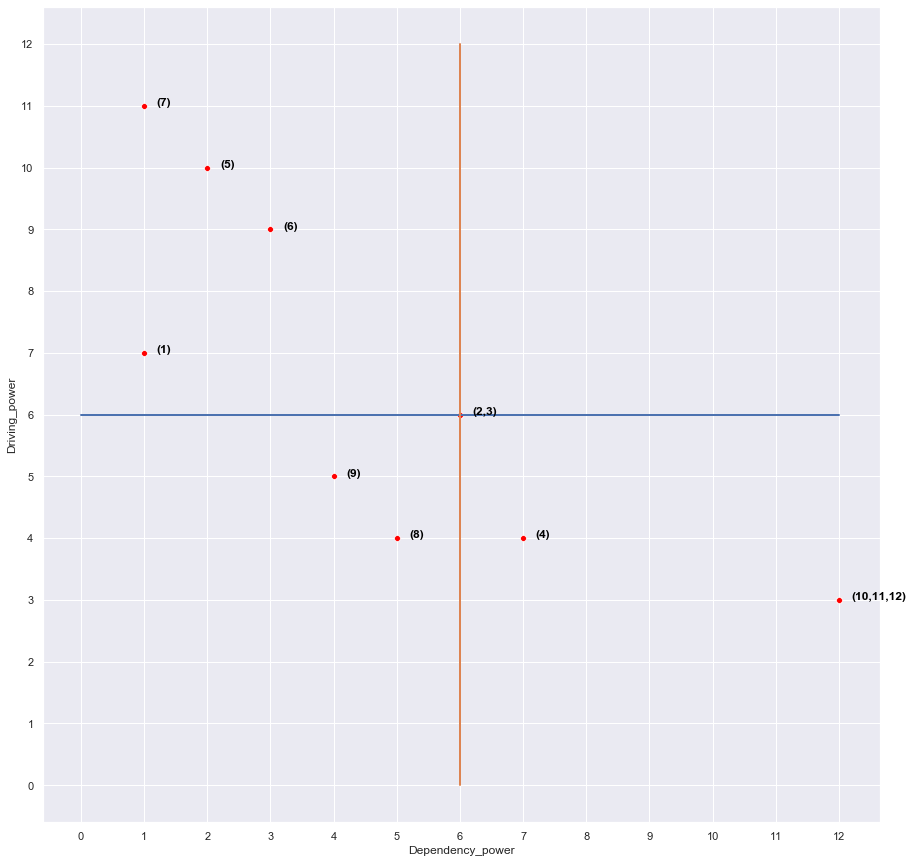

In [78]:
plt.clf()
plt.rcParams['figure.figsize'] = [15, 15]
plt.xticks(np.arange(0, max(plot_frame['Parameters'])+1, 1.0))
plt.yticks(np.arange(0, max(plot_frame['Parameters'])+1, 1.0))

sns.set(style="darkgrid")
sns_p1t=sns.scatterplot(data=plot_frame, x="Dependency_power", y="Driving_power",color='red' )
shift = 0.2

for (dependency, drive), size in list_of_combos.items():
    parameters = plot_frame[(plot_frame.Dependency_power == dependency) & (plot_frame.Driving_power == drive)].Parameters.tolist()
    text ="(" + ",".join(map(str,parameters)) + ")"
    sns_p1t.text(dependency+shift, drive, text, horizontalalignment='left', size='medium', color='black', weight='semibold')

plt.plot([0, max(plot_frame['Parameters'])], [max(plot_frame['Parameters'])/2, max(plot_frame['Parameters'])/2], linewidth=2)
plt.plot([max(plot_frame['Parameters'])/2, max(plot_frame['Parameters'])/2], [0, max(plot_frame['Parameters'])], linewidth=2)


In [79]:
!jupyter nbconvert --to html --template html_nocode.tpl ISM\ model.ipynb --output $file_id

[NbConvertApp] Converting notebook ISM model.ipynb to html
[NbConvertApp] Writing 460130 bytes to AE3p.html
